# 들어가며

딥러닝 내부를 좀 더 깊게 들여다보자. 신경망이 어떤 식으로 구성돼있고, 그 과정에서 어떤 용어들이 사용되는지 보자.

**학습 목표**
- 딥러닝 문제 구성에 대한 기본적인 이해를 높인다.
- Neural Network에 사용되는 용어들에 대한 이해를 높인다.
- 딥러닝 프레임워크를 사용하지 않고, Numpy만을 이용해 딥러닝 모델과 훈련 과정을 직접 구현해 본다.

# 신경망 구성 (1) 개요

- Perceptron: a computer model or computerized machine devised to represent or simulate the ability of the brain to recognize and discriminate.
- ANN(Artificial Neural Network): a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. 



In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=5)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4948 - accuracy: 0.8827
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2322 - accuracy: 0.9348
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1832 - accuracy: 0.9474
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1538 - accuracy: 0.9551
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1327 - accuracy: 0.9626
313/313

## 다층 퍼셉트론 overview

![image.png](https://d3s0tskafalll9.cloudfront.net/media/images/f-14-1.max-800x600.png)

[What is the role of the bias in neural networks?](https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks)

input layer / hidden layer / output layer

This ANn has `2 layers`. We count how many parts are interconnected to each other nodes.

- MLP:  a class of feedforward artificial neural network (ANN) which has more than 2 layers.

## Parameters / Weitghts

Let's make again the MLP based moedel with Numpy.

In [8]:
# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)


weight_init_std = 0.1
input_size = 784
hidden_size=50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1   # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(60000, 784)
(5, 784)
(784, 50)
(50,)
(5, 50)


# 신경망 구성 (2) 활성화 함수와 손실 함수

## Activation Functions

[Why must a nonlinear activation function be used in a backpropagation neural network?](https://stackoverflow.com/a/54503251)

1. Sigmoid
  - vanishing gradient
  - expensive because of exp function
2. Tanh
  - median of function is 0. (solved problem of sigmoid)
  - still has vanishing gradient
3. Relu
  - faster learning time than sigmoid, tanh
  - easy to make
  
  
[딥러닝에서 사용하는 활성화 함수](https://reniew.github.io/12/)
[Activation Function](https://pozalabs.github.io/Activation_Function/)
[위키독스: 비선형 활성화 함수](https://wikidocs.net/60683)


In [14]:
# 위 수식의 sigmoid 함수를 구현해 봅니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


z1 = sigmoid(a1)
print(z1[0])  # sigmoid의 출력은 모든 element가 0에서 1사이

[0.43545687 0.31147564 0.826834   0.32459515 0.50473724 0.69571872
 0.4121387  0.48222724 0.34986596 0.28501989 0.83823049 0.3279586
 0.47436132 0.39944631 0.53547047 0.18975798 0.21306278 0.31371006
 0.78979204 0.77422679 0.45056284 0.11797333 0.50697381 0.79728004
 0.49149912 0.62231771 0.82622398 0.50701463 0.36288699 0.43720983
 0.48703167 0.6126574  0.37215817 0.33375061 0.59442777 0.39783317
 0.22905009 0.35065764 0.32345405 0.69951205 0.33659919 0.24827533
 0.64517112 0.74828416 0.17780474 0.2426634  0.42862077 0.87724333
 0.52920079 0.87653624]


In [15]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

print('go~')

go~


In [16]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[ 0.34459154  0.0727077   0.44631997 -0.16839248 -0.39462872 -0.02726849
  0.16175345  0.2169799  -0.33646283 -0.46221036]


In [17]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [18]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.
np.sum(y_hat[0])

0.9999999999999999

## Loss Functions

### MSE


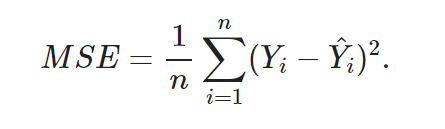


### Cross Entropy

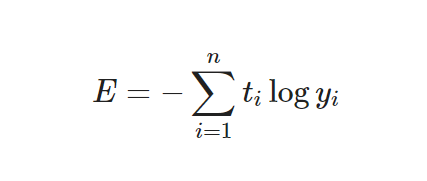

[Understanding different Loss Functions for Neural Networks.](https://towardsdatascience.com/understanding-different-loss-functions-for-neural-networks-dd1ed0274718)
[손실함수(Loss Function)](http://www.gisdeveloper.co.kr/?p=7631)



In [19]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [21]:
print(y_hat[0])
print(t[0])

[0.13698381 0.10437382 0.15165241 0.08201307 0.06540786 0.09444359
 0.11409422 0.12057248 0.06932519 0.06113355]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [22]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.571931293402123

# Gradient Descent

Calculate slope at every step and move forward by that slope.

[gradient descent](https://angeloyeo.github.io/2020/08/16/gradient_descent.html)

![](https://d3s0tskafalll9.cloudfront.net/media/images/f-14v3-3-1.max-800x600.png)

[[머신러닝] lec 7-1 : 학습 Learning rate, Overfitting, 그리고 일반화](https://aileen93.tistory.com/71)

[Weight Initialization](https://reniew.github.io/13/)



In [23]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.02739676,  0.02087476,  0.03033048,  0.01640261,  0.01308157,
        -0.18111128,  0.02281884,  0.0241145 ,  0.01386504,  0.01222671],
       [-0.17895017,  0.02201823,  0.03422854,  0.01915244,  0.01243678,
         0.02153825,  0.02294823,  0.02405732,  0.01265029,  0.00992009],
       [ 0.02175816,  0.02377317,  0.02733187,  0.0185676 , -0.18944538,
         0.02283653,  0.0232884 ,  0.02576087,  0.01511646,  0.01101232],
       [ 0.02426848, -0.17614438,  0.03029083,  0.02146004,  0.01136646,
         0.01842577,  0.02166821,  0.02466733,  0.01293581,  0.01106144],
       [ 0.02211639,  0.02351546,  0.03205126,  0.02052996,  0.00945081,
         0.02358701,  0.02185352,  0.02275444,  0.01582757, -0.19168643]])

In [24]:
# chain rule
dW2 = np.dot(z1.T, dy)    
dW2

array([[ 0.00764931, -0.04701474,  0.04738949,  0.03021786, -0.07622228,
        -0.03867047,  0.03563188,  0.03884099,  0.02229277, -0.0201148 ],
       [-0.00097782, -0.02938957,  0.06667416,  0.04166529, -0.06460024,
        -0.0599552 ,  0.04896615,  0.05272211,  0.03114456, -0.08624945],
       [-0.05844672, -0.01500112,  0.11320288,  0.06951692, -0.08770694,
        -0.100315  ,  0.08230918,  0.08814259,  0.0519088 , -0.14361058],
       [ 0.02039143, -0.11607138,  0.07418374,  0.04815435, -0.08165688,
        -0.02872843,  0.05477166,  0.05984547,  0.03453259, -0.06542255],
       [-0.05527954, -0.07489739,  0.07090979,  0.04413126, -0.03172666,
        -0.04514561,  0.05111564,  0.0552485 ,  0.03138054, -0.04573653],
       [-0.03051944, -0.01355612,  0.07527302,  0.04687093, -0.09976522,
        -0.04821568,  0.05554906,  0.05978701,  0.03507632, -0.08049988],
       [-0.07630334,  0.00293123,  0.07880465,  0.04819786, -0.0866154 ,
        -0.05054739,  0.05755832,  0.06167786

In [25]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [26]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [27]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [28]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

# Backpropagation

![](https://d3s0tskafalll9.cloudfront.net/media/images/f-14-6.max-800x600.png)


In [29]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [30]:
# see at one cycle which Forward Propagation and Backward Propagation work

# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.16757252 0.09175175 0.1222874  0.10400752 0.06240875 0.13425563
  0.0969081  0.05817044 0.08149902 0.08113889]
 [0.16251844 0.07647449 0.13679775 0.1104037  0.07055275 0.10578245
  0.09746318 0.05286761 0.08113976 0.10599987]
 [0.12383868 0.09274621 0.14151218 0.06763057 0.07150085 0.11054173
  0.12519807 0.07468941 0.09105581 0.10128649]
 [0.15459403 0.10101377 0.10549134 0.07873118 0.07459085 0.12230919
  0.13136311 0.06872877 0.09992387 0.06325389]
 [0.15542348 0.08801374 0.11945714 0.0883147  0.07418255 0.10946786
  0.11187059 0.07149369 0.1038946  0.07788166]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.26161650234916


# Learning Model

In [31]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [32]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.10633806 0.07094641 0.11547596 0.0882818  0.14217454 0.15038366
  0.1339216  0.06502967 0.06837648 0.05907182]
 [0.09477394 0.07628736 0.11933379 0.0819566  0.14063104 0.12582868
  0.15585584 0.06913765 0.06694722 0.06924789]
 [0.1036831  0.07277582 0.11838879 0.08052042 0.17254603 0.13758065
  0.11997827 0.06263827 0.08279448 0.04909417]
 [0.08351515 0.0715045  0.11099815 0.08396209 0.1640545  0.13914685
  0.12052075 0.08085174 0.0725128  0.07293346]
 [0.09137843 0.07668697 0.11169575 0.07588351 0.14608417 0.13804625
  0.14266226 0.07665711 0.07288917 0.06801639]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.266783809672429
---------
[[0.12193394 0.08347118 0.09708431 0.07915377 0.14924603 0.16945064
  0.10912238 0.05872337 0.06182696 0.06998743]
 [0.11396155 0.08905259 0.10138371 0.07498471 0.14652483 0.13811956
  0.12887364 0.0632401  0.0612

You can see that `y_hat` is approaching to value `t`.

# Calculating Accuracy

In [33]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [34]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.16051462, 0.12028901, 0.05442595, 0.0507067 , 0.15320419,
       0.21953909, 0.05719644, 0.03845799, 0.04097212, 0.1046939 ])

In [35]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [36]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.16051462 0.12028901 0.05442595 0.0507067  0.15320419 0.21953909
 0.05719644 0.03845799 0.04097212 0.1046939 ]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.09


# Running entire cycle

Below this shows the complete procedure about learning

In [37]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [38]:
# 하이퍼파라미터
iters_num = 5000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.2994634643891265
train acc, test acc | 0.089, 0.09
Loss:  0.8005801464169102
train acc, test acc | 0.7794, 0.7878
Loss:  0.5499876219691928
train acc, test acc | 0.87885, 0.8829
Loss:  0.31379276163891834
train acc, test acc | 0.9002333333333333, 0.9013
Loss:  0.24551677088588103
train acc, test acc | 0.9079833333333334, 0.9117
Loss:  0.4481906349337353
train acc, test acc | 0.9146166666666666, 0.9185
Loss:  0.2791911424805514
train acc, test acc | 0.91995, 0.9221
Loss:  0.2747739278655903
train acc, test acc | 0.9240666666666667, 0.9245
Loss:  0.2939497503851974
train acc, test acc | 0.9284333333333333, 0.9303


You can see that learning is possible without Deeplearning Framework.

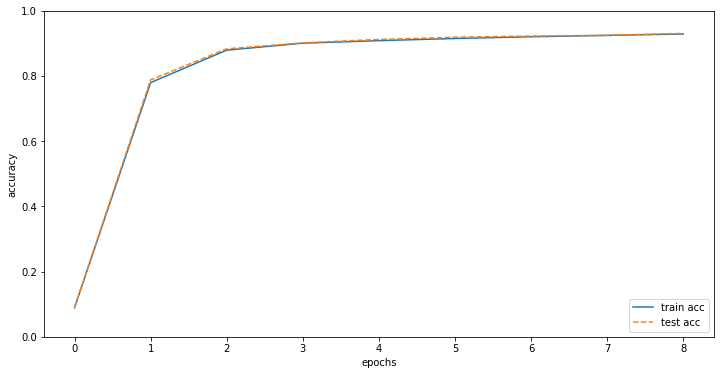

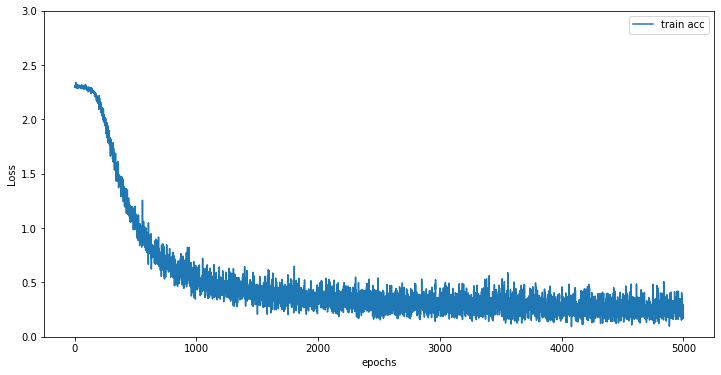

In [40]:
# Visulizing the changes of Accuracy, loss

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()